In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
# from matplotlib import dates as mdates
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())

In [2]:
trips = []
for i in range(1, 25):
    trips.append(pd.read_pickle(f'data/bluebikes/trips_combined_boston/{i}.pkl'))
combined_trips = pd.concat(trips)
combined_trips

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,413,2015-01-01 16:19:32,2015-01-01 16:26:26,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,481.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,575,2015-01-02 08:06:49,2015-01-02 08:16:25,90.0,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1295.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,886,2015-01-02 11:38:38,2015-01-02 11:53:24,95.0,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,652.0,casual,1992,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1027,2015-01-02 13:33:05,2015-01-02 13:50:12,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1094.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,383,2015-01-05 10:15:46,2015-01-05 10:22:09,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,761.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616979,312,2024-01-12 15:38:53,2024-01-12 15:44:05,NaN,Charlestown Navy Yard,42.374125,-71.054812,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,BA5F71F2B4F60857,classic_bike,D32039,D32038,member
11616980,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
11616981,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
11616982,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member


In [3]:
open_spaces = pd.read_csv('open_spaces_nearest_stations_k_10_d_0.3.csv')

In [4]:
stations = pd.read_csv('data/bluebikes/stations_with_roundtrip_data.csv')
stations

,Number,Name,Latitude,Longitude,Public,Total docks,roundtrip_ratio,trips,log_trips
0,A32019,175 N Harvard St,42.364475,-71.128408,Yes,17,0.041054,175088,5.243256
1,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Yes,17,0.329957,691,2.839478
2,C32106,555 Metropolitan Ave,42.268100,-71.119240,Yes,18,0.275449,334,2.523746
3,C32105,606 American Legion Hwy at Canterbury St,42.285780,-71.109725,Yes,18,0.075178,1543,3.188366
4,C32091,645 Summer St,42.341781,-71.039870,Yes,19,0.027830,17032,4.231266
...,...,...,...,...,...,...,...,...,...
208,C32034,Watermark Seaport - Boston Wharf Rd at Seaport...,42.351586,-71.045693,Yes,15,0.026880,161461,5.208068
209,B32021,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,Yes,12,0.049047,89669,4.952642
210,D32022,West End Park,42.365908,-71.064467,Yes,35,0.015364,41526,4.618320
211,B32059,Whittier St Health Center,42.332863,-71.092189,Yes,19,0.017747,12284,4.089340


# Weighted Roundtrip Ratio Bar Graph
Do the thing like Four Seasons

In [5]:
# TODO: export this and weighted_roundtrip_ratio
def get_nearest_stations(open_space, d=0.3, verbose=False):
    station_names = []
    num_stations = open_spaces.loc[open_spaces['Name'] == open_space, 'NUM STATIONS'].iloc[0]
    for station_id in open_spaces.loc[open_spaces['Name'] == open_space, [f'Station {k}' for k in range(1, num_stations + 1)]].iloc[0]:
        station_names.append(stations.loc[stations['Number'] == station_id, 'Name'].iloc[0])
    if verbose:
        if num_stations == 0:
            print(f'No stations within {d} km of {open_space}')
        else:
            print(f'{num_stations} nearest station{"s" if num_stations > 1 else ""} to {open_space}: {", ".join(station_names)}')
    return station_names

Correlation between weighted roundtrip ratios if you consider trips between two different stations close to an open space as roundtrips or not?

In [6]:
def get_weighted_roundtrip_ratio(open_space, verbose=False):
    station_names = get_nearest_stations(open_space, verbose=verbose)
    if station_names == []:
        return None
    selected_stations = stations.loc[stations['Name'].isin(station_names)]
    return np.average(selected_stations['roundtrip_ratio'], weights=selected_stations['trips'])

In [7]:
open_spaces['weighted_roundtrip_ratio'] = open_spaces['Name'].apply(get_weighted_roundtrip_ratio)
open_spaces[['Name', 'weighted_roundtrip_ratio']]

,Name,weighted_roundtrip_ratio
0,Wilson Park,NaN
1,James H. Roberts Playground,0.051670
2,Smith Playground,0.041054
3,Fern Square,NaN
4,Ringer Playground,0.031234
...,...,...
529,Mahoney Park,0.028803
530,Boundary I,NaN
531,Sprague Pond,NaN
532,Codman Square,0.126667


In [8]:
px.bar(open_spaces.sort_values(by='weighted_roundtrip_ratio'), x='Name', y='weighted_roundtrip_ratio')

# Hourly Activity Plots

In [9]:
TOTAL_DAYS = (datetime.date(2024, 1, 31) - datetime.date(2015, 1, 1)).days + 1
TOTAL_WEEKDAYS = TOTAL_DAYS * 5 / 7
TOTAL_WEEKENDS = TOTAL_DAYS * 2 / 7
HOURS_FORMATTED = [datetime.time(i).strftime('%-I %p') for i in range(24)]

In [10]:
def plot_day_hourly(df_name, df, station_names, ax, color):
    day_corrector = TOTAL_WEEKDAYS if df_name == 'weekdays' else TOTAL_WEEKENDS
    started = df.loc[df['start_station_name'].isin(station_names)]
    ended = df.loc[df['end_station_name'].isin(station_names)]
    
    # Conventional histogram
    b1 = np.histogram([t.hour for t in started['started_at'].dt.time], bins=range(25))[0] / day_corrector
    b2 = np.histogram([t.hour for t in ended['ended_at'].dt.time], bins=range(25))[0] / day_corrector
    '''
    plt.xticks(range(0, 24, 4), HOURS_FORMATTED[::4])
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Number of Arrivals or Departures')
    plt.title(f'Hourly Bluebike Arrivals and Departures Near {open_space}')
    plt.show()
    '''
    
    # Polar line plot
    ax.plot(np.linspace(np.pi/24, 49/24*np.pi, 25), list(b1) + [b1[0]], '--', color=f'dark{color}', label=f'{df_name.title()[:-1]} Departures')
    ax.plot(np.linspace(np.pi/24, 49/24*np.pi, 25), list(b2) + [b2[0]], '-', color=color, label=f'{df_name.title()[:-1]} Arrivals')

In [11]:
def plot_activity(open_space):
    station_names = get_nearest_stations(open_space, verbose=True)
    selected_stations = combined_trips.loc[(combined_trips['start_station_name'].isin(station_names)) | (combined_trips['end_station_name'].isin(station_names))]
    weekdays = selected_stations.loc[selected_stations['ended_at'].dt.day_of_week < 5]
    weekends = selected_stations.loc[selected_stations['ended_at'].dt.day_of_week >= 5]
    

    _, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    for w, c in [('weekdays', 'red'), ('weekends', 'cyan')]:
        plot_day_hourly(w, eval(w), station_names, ax, c)
    
    ax.set_theta_direction(-1)
    #ax.set_theta_zero_location("S")
    ax.set_xticks(np.linspace(0, 23/12*np.pi, 24), HOURS_FORMATTED)
    plt.xlabel('Arrivals or Departures per Hour per Day')
    plt.legend()
    plt.title(f'Hourly Bluebike Arrivals and Departures Near {open_space}')
    plt.show()

    """
    station_year_trunc = selected_stations.loc[selected_stations['ended_at'].dt.date < datetime.date(2024, 1, 1)]

    b3 = np.histogram(station_year_trunc['ended_at'].dt.dayofyear, bins=365//5)
    '''
    xax = plt.gca().xaxis
    xax.set_major_locator(mdates.MonthLocator())
    xax.set_major_formatter(mdates.DateFormatter('%b'))
    plt.title(f'Average (Daily?) Rides During the Year, {open_space}')
    plt.show()
    '''

    _, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location("N")
    ax.plot(np.linspace(0, 2*np.pi, 74), list(b3[0]) + [b3[0][0]])
    plt.xticks(np.array([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]) * 2*np.pi/365,
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title(f'Average (Daily?) Rides During the Year, {open_space}')
    plt.show()
    """

    #selected_stations.loc[]

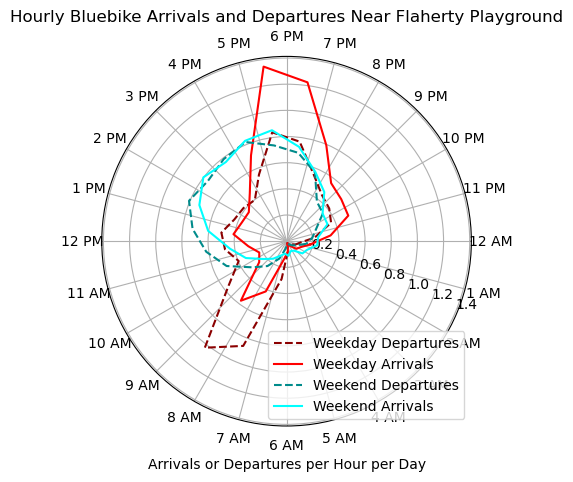

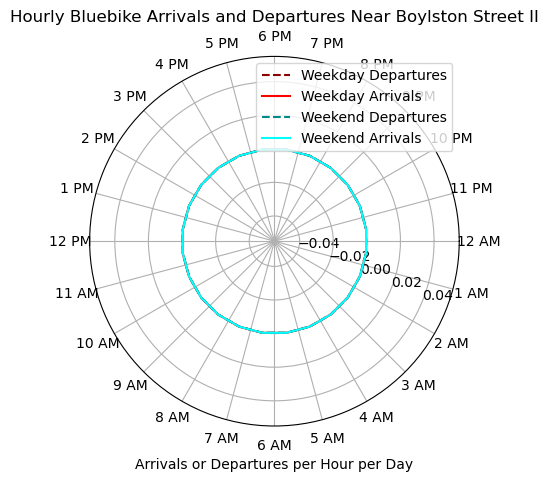

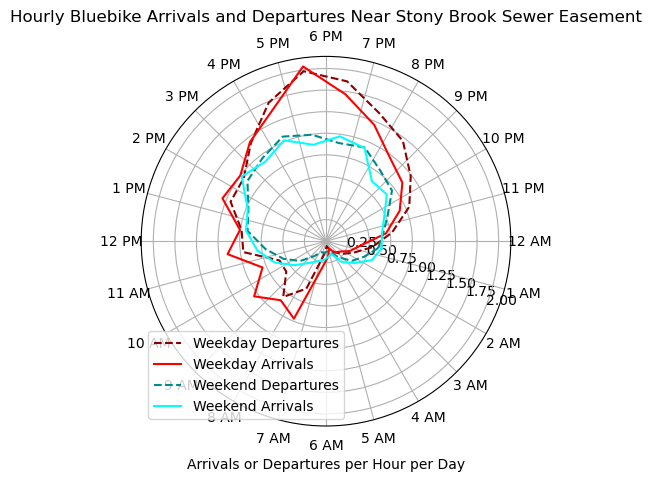

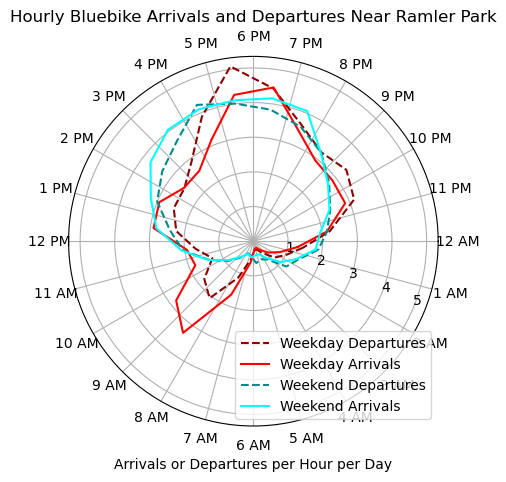

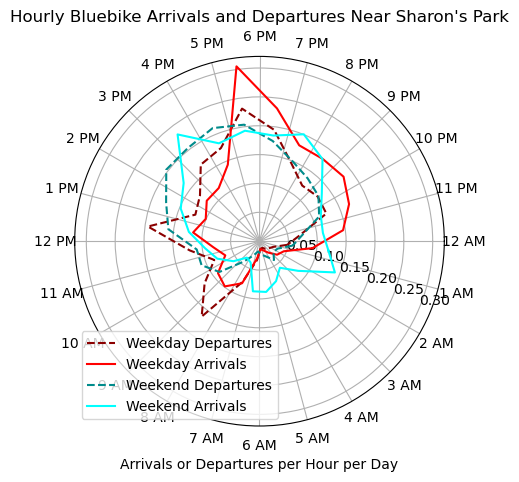

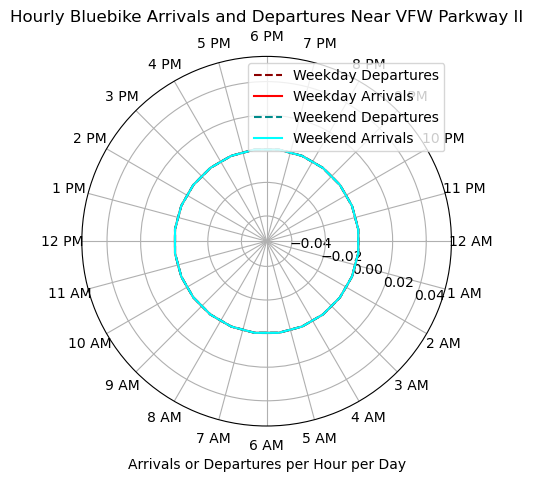

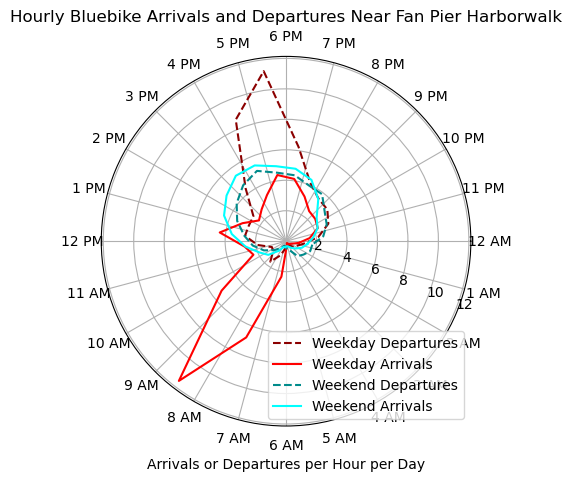

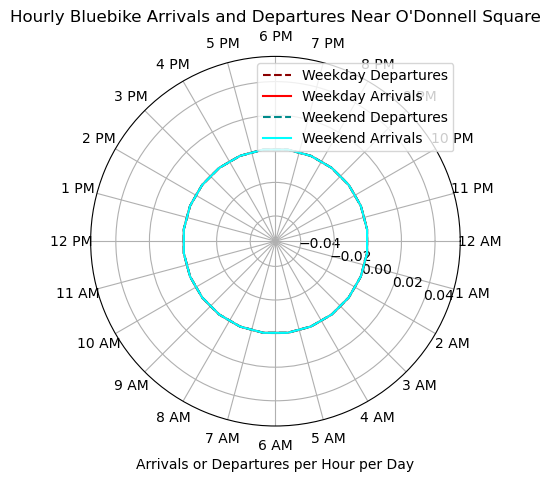

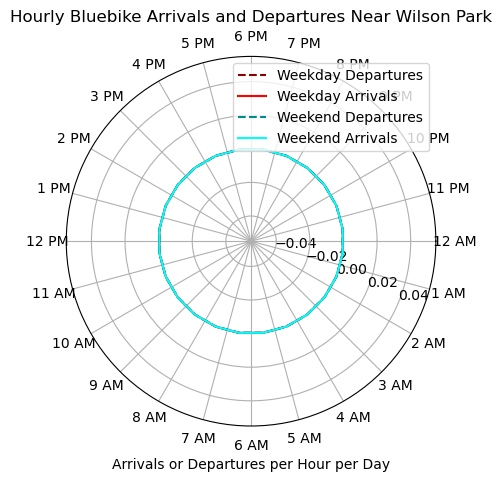

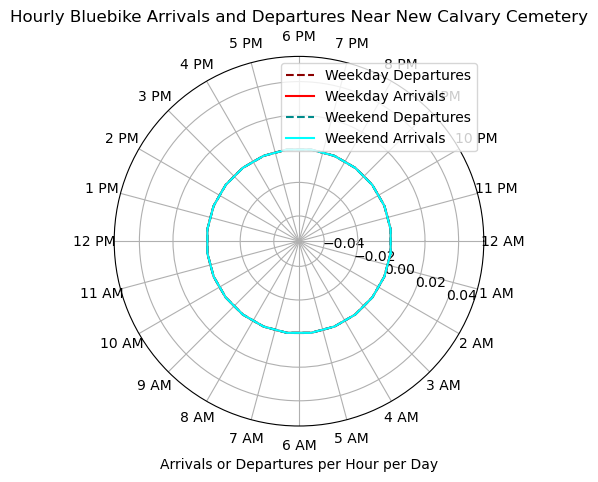

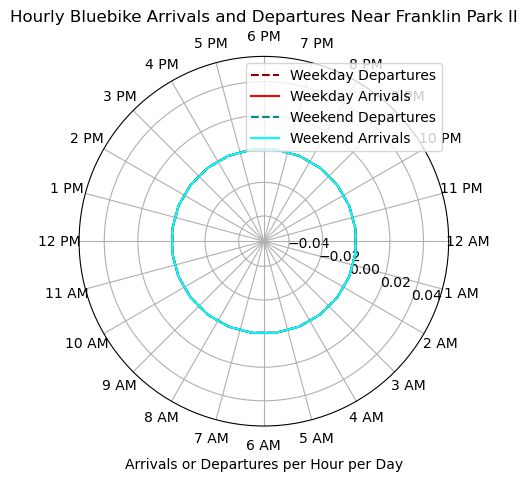

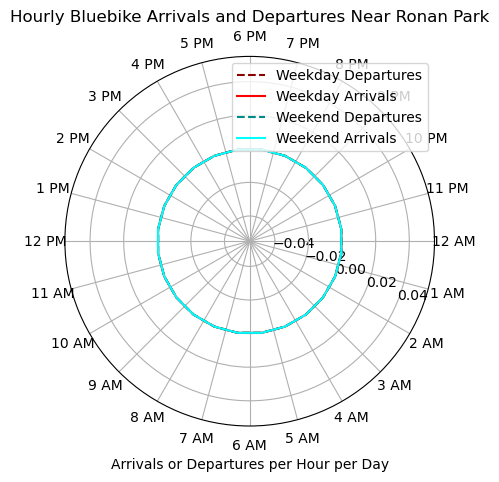

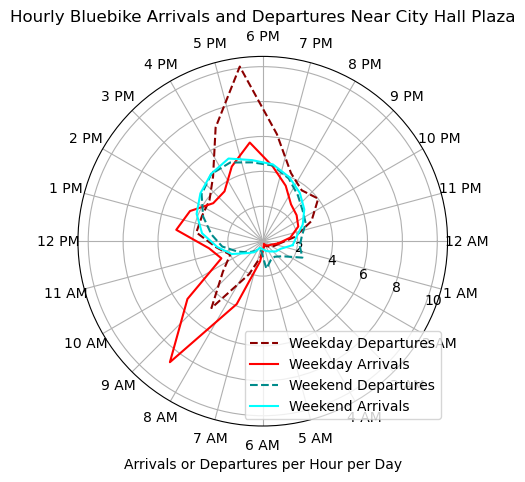

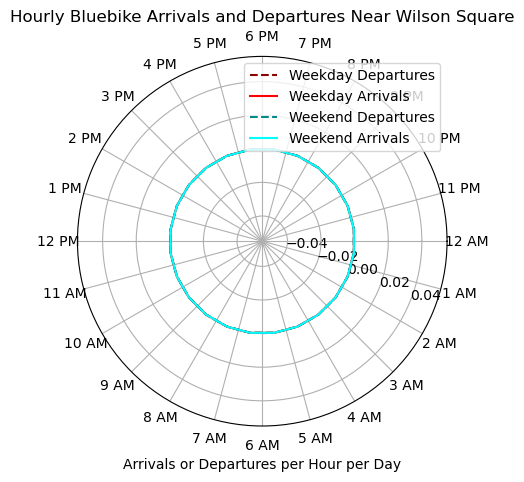

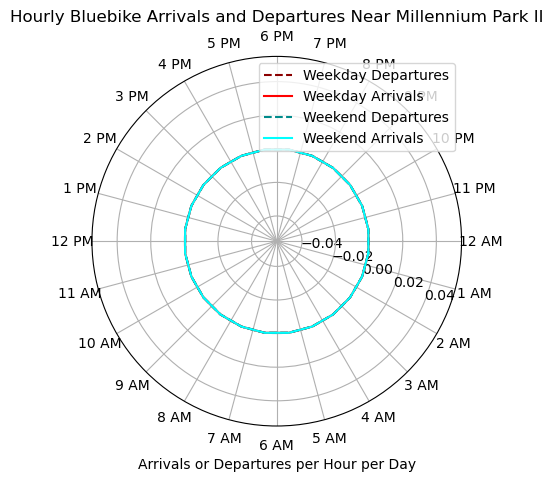

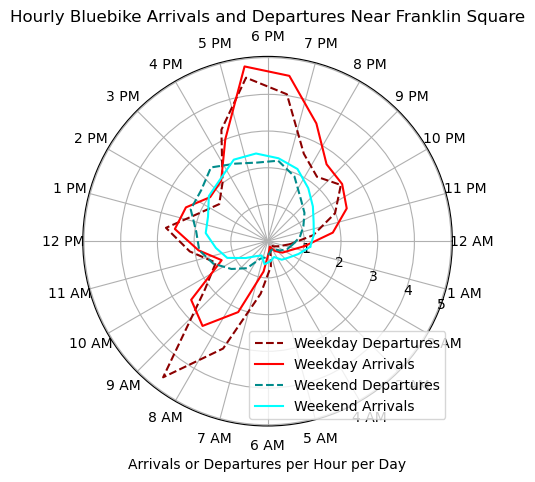

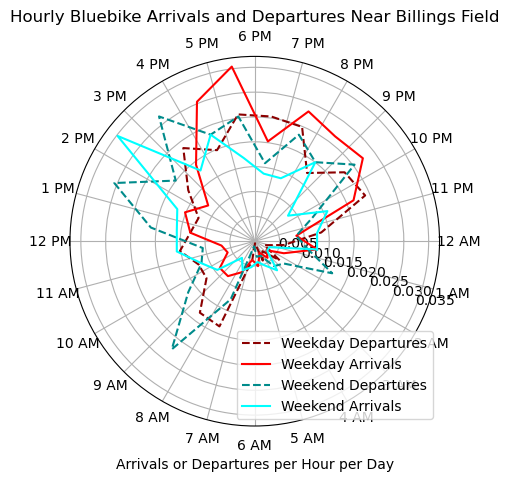

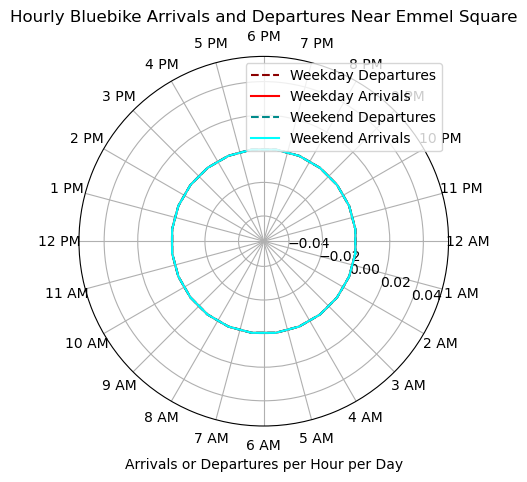

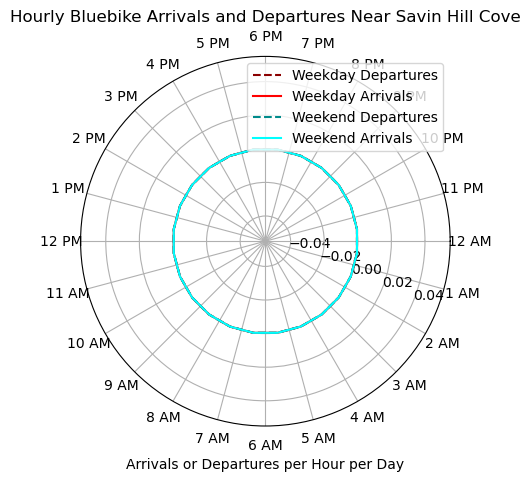

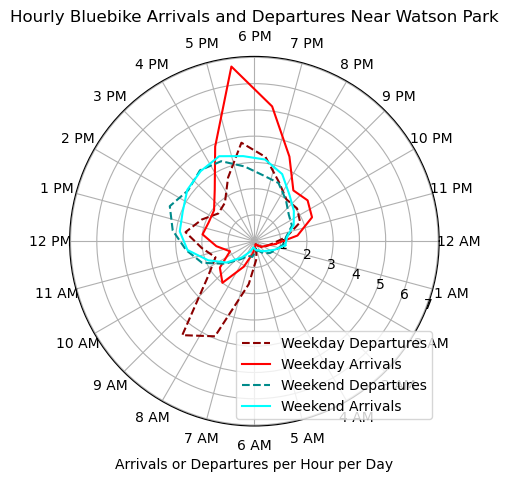

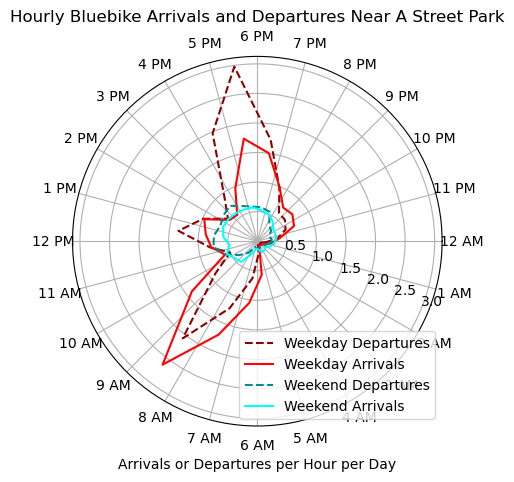

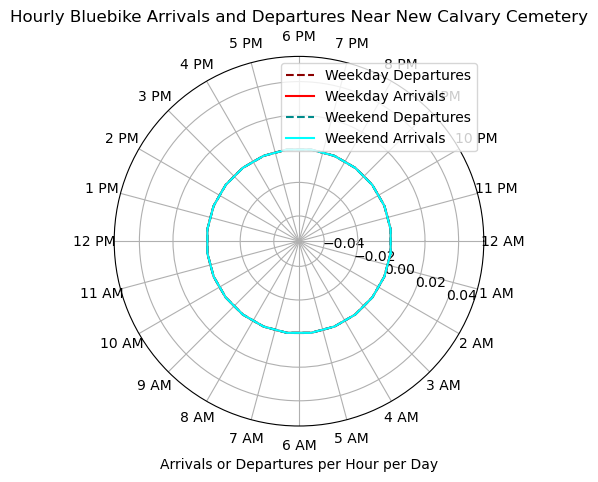

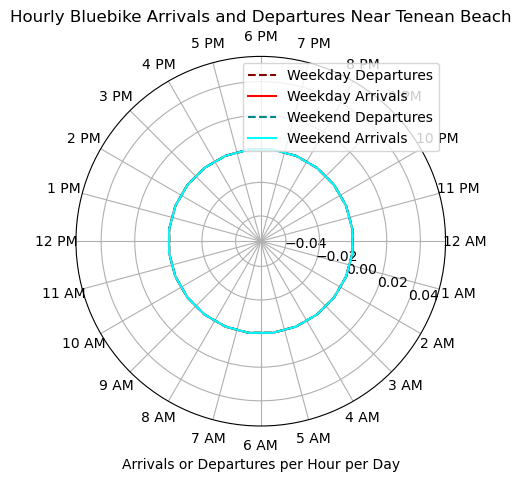

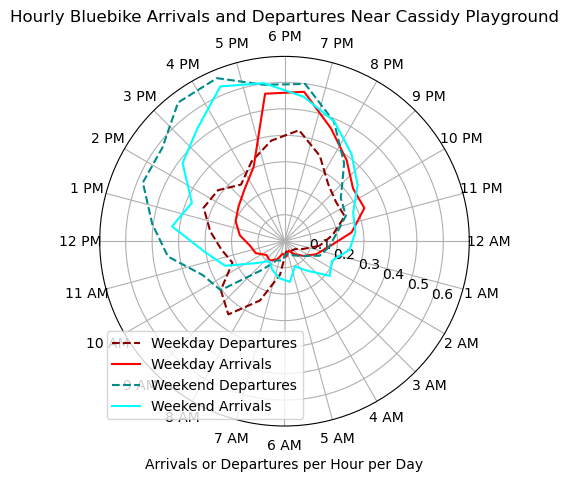

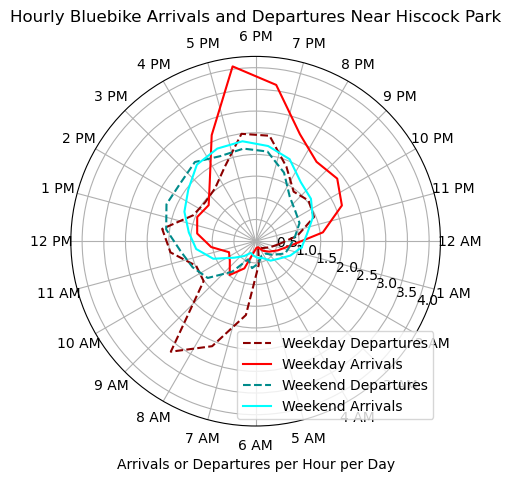

In [12]:
for c in np.random.choice(open_spaces['Name'], 25):
    plot_activity(c)